<a href="https://colab.research.google.com/github/michaelsong4399/asteroseismology/blob/yihong/NNLightCurveNewTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install lightkurve
!pip install astroquery
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install pandas
!pip install tensorflow
!pip install astropy
!pip install statsmodels

     |████████████████████████████████| 245kB 7.9MB/s 
     |████████████████████████████████| 6.5MB 17.3MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 256kB 39.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 43.3MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=cd6d89028f7e01d1029b8d35bdd3f45f1075f7b2ac46ce66436da7f75e05a48a
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for astroquery: filename=astroquery-0.4.1-cp37-none-any.whl size=3831874 sha256=6deaf9e2cca00c3524f74f606eb6b0b9597cf26a391bbcd69803d06cd28e6ca3
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
  Created wheel for oktopus: filename=oktopus-0.1.2-cp37-none-any.whl size=12780 sha256=7f9804400f6b96ffd973151014192d75aafa97f64629b260fe61321a9

In [3]:
import lightkurve as lk
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sklearn
import math
import scipy
import pandas as pd 
from scipy import interpolate
#tf
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
#sm
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ML Model

## Cycle Configs

In [4]:
#Cycles
    #21
        #cycle_21 = []
        
        #Start 1 March 1976
        #End 1 September 1986
        
    #22
        #cycle_22 = [2446674.5,2450296.5]
        
        #Start: 1 September 1986 2446674.5
        #End: 1 August 1996 2450296.5
        
    #23
cycle_23 = [2450296.5,2454801.5]
        
        #Start: 1 August 1996 2450296.5
        #End: 1 December 2008 2454801.5
        
    #24
cycle_24 = [2454801.5,2458940.5]
        
        #Start: 1 December 2008 2454801.5
        #End: 1 May 2020 2458970.5
        #NOTE: Due to dataset limitation, only analyzed up to 2458940.5

cycle_2324 = [2450296.5,2458940.5]
        

## BiSON Surface Velocity - Import X

In [5]:
#hdul = fits.open('data/allsites-alldata-waverage-fill.fits')
hdul = fits.open('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/allsites-alldata-waverage-fill.fits')

hdul.info()

tsdata = hdul[0].data
#         SIMPLE  =                    T / Written by IDL:  Tue Jan 19 11:22:20 2016      
#         BITPIX  =                  -64 /Real*8 (double precision)                       
#         NAXIS   =                    2 /                                                
#         NAXIS1  =                    2 /                                                
#         NAXIS2  =             24455519 /                                                
DSTART =        2442778.50000 #Data start (Julian)      1/1/1976 0:00:00                        
DEND   =        2458940.50000 #Data end (Julian)        4/1/2020 0:00:00                       
#         STATIONS= 'na ca cb su iz la lb mo' /Stations Used                              
#         METHOD  = 'waverage'           /Overlap Method                                  
#         CADENCE = '40      '           /Timeseries Cadence                              
#         N-THRES =                   80 /Noise Rejection Threshold                       
#         GAPFILL =                    1 /GapFill                                         
#         FILL    =             0.638866 /Duty Cycle   
#
#         ~2160 datapoints per day

Filename: /content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/allsites-alldata-waverage-fill.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (2, 34909918)   float64   


In [6]:
NOISE = False

if NOISE:
  noise = np.random.normal(0, 0.2*np.max(tsdata.T[1]), tsdata.T[1].shape)
  tsdata = np.array([tsdata.T[0],np.add(tsdata.T[1],noise).T]).T

In [7]:
def getSV(cycle):
    #Subtract starting date
    cycle = np.subtract(cycle,DSTART)
    
    #multiply by 2160 (2160 datapoints per day)
    cycle = np.multiply(cycle,2160)
    
    return tsdata[int(cycle[0]):int(cycle[1])].T[1]

def getSV_index(cycle):
    #Subtract starting date
    cycle = np.subtract(cycle,DSTART)
    
    #multiply by 2160 (2160 datapoints per day)
    cycle = np.multiply(cycle,2160)
    
    return tsdata[int(cycle[0]):int(cycle[1])].T[0]

#test
print(getSV(cycle_23))
print(getSV_index(cycle_23))

[ 0.52007627  0.87248993  0.11934945 ...  0.25079036 -1.0275805
 -0.95429337]
[2450296.50033958 2450296.50080254 2450296.50126551 ... 2454801.49915418
 2454801.49961714 2454801.50008011]


## Sunspot Number - Import Y

In [8]:
#sunspot_Day = np.genfromtxt('data/SN_d_tot_V2.0.csv',delimiter=';')
sunspot_Day = np.genfromtxt('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/SN_d_tot_V2.0.csv',delimiter=';')
SNSTART_Day = 2385070.5
SNEND_day = 2459000.5

#sunspot_Month = np.genfromtxt('data/SN_ms_tot_V2.0.csv',delimiter=';')
sunspot_Month = np.genfromtxt('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/SN_ms_tot_V2.0.csv',delimiter=';')
sunspot_Month = sunspot_Month[828:]

In [9]:
def getSN_Day(cycle):
    if cycle[1] >= SNEND_day:
        cycle[1] = SNEND_day
    cycle = np.subtract(cycle, SNSTART_Day)
    sn = sunspot_Day.T[4][int(cycle[0]):int(cycle[1])]
    
    npout = [[0,0]]
    for i in range(len(sn)):
        npout = np.append(npout,[[i+SNSTART_Day+cycle[0],sn[i]]],0)
    npout = npout[1:]
    return npout

def getSNAverage(cycle,length):
    
    npout = [[0,0]]
    total = 0
    valid_count = 0
    start = cycle[0][0]
    for i in range(len(cycle)):
        if cycle[i][1] >= 0:
            total += cycle[i][1]
            valid_count += 1
        if (i+1) % length < 1 or i == len(cycle)-1:
            if valid_count == 0:
              npout = np.append(npout,[[start,np.average(cycle)]],0)
            else:
              npout = np.append(npout,[[start,total/valid_count]],0)
            total = 0
            valid_count = 0
            if i == len(cycle)-1:
                break
            start = cycle[i+1][0]
    npout = npout[1:]
    return npout

#Test
getSN_Day(cycle_23)
getSNAverage(getSN_Day(cycle_23),365)

array([[2.45029650e+06, 1.45643836e+01],
       [2.45066150e+06, 6.19232877e+01],
       [2.45102650e+06, 1.21704110e+02],
       [2.45139150e+06, 1.69175342e+02],
       [2.45175650e+06, 1.53487671e+02],
       [2.45212150e+06, 1.78747945e+02],
       [2.45248650e+06, 1.29030137e+02],
       [2.45285150e+06, 7.85397260e+01],
       [2.45321650e+06, 5.33808219e+01],
       [2.45358150e+06, 3.17945205e+01],
       [2.45394650e+06, 1.95780822e+01],
       [2.45431150e+06, 6.09041096e+00],
       [2.45467650e+06, 2.98400000e+00]])

## LOI Luminosity - Import Pred_Y

In [10]:
#hdul = fits.open('data/allsites-alldata-waverage-fill.fits')
hdul = fits.open('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/ts_loi.fits')

hdul.info()

loidata = hdul[0].data

# variations at at most 2000 ppm
# cadence: 60s
LOI_DSTART =        2450174.50000 #Data start (Julian)      1 April 1996 0:00:00                        
LOI_DEND   =        2458589.50000 #Data end (Julian)        15 April 2019 0:00:00  

#    #23
# cycle_23 = [2450296.5,2454801.5]
        
#         #Start: 1 August 1996 2450296.5
#         #End: 1 December 2008 2454801.5
        
#     #24
# cycle_24 = [2454801.5,2458940.5]
        
#         #Start: 1 December 2008 2454801.5
#         #End: 1 May 2020 2458970.5


Filename: /content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/ts_loi.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (12117600,)   float64   


In [11]:
#Prepare LOI

if NOISE:
  noise = np.random.normal(0, 0.2*np.max(loidata), loidata.shape)
  loidata = np.add(loidata,noise)

loidatax = np.arange(LOI_DSTART,LOI_DEND,1/1440)
loifull = np.append([loidatax],[loidata],0).T
print(loifull.shape)

(12117600, 2)


In [12]:
def getLOI(cycle):
    #Subtract starting date
    cycle = np.subtract(cycle,LOI_DSTART)
    
    #multiply by 1440 (1440 datapoints per day)
    cycle = np.multiply(cycle,1440)
    
    return loifull[int(cycle[0]):int(cycle[1])]

print(getLOI([2450174.5,2458590.5]).shape)

(12117600, 2)


## Helper Functions

In [13]:
#Interpolation
def interpolate(data, smoothness):
    from scipy import interpolate
    x_new = np.linspace((data[0][0])-1,int(data[-1][0])+1,smoothness)
    a_BSpline = interpolate.make_interp_spline(data.T[0],data.T[1])
    y_new = a_BSpline(x_new)
    return x_new,y_new

In [14]:
def normalize1D(data):
    return np.divide(np.nan_to_num(data,np.nanmean(data)),np.nanmax(data))

In [15]:
def normalize2D(data,feature = None):
    threshold = 0.4
    data = np.asarray(data).T
    power = data[0:int(len(data)/2)].T
    freq = data[int(len(data)/2):].T
    data = power
    for i in range(int(len(data))):
        # Scale to 0-1
        if np.isnan(data[i]).all():
            data[i] = np.nan_to_num(data[i],np.nanmean(data[i-1]))
        else:
            data[i] = np.nan_to_num(data[i],np.nanmean(data[i-1] if i > 0 else 0))
            maximum = float(np.nanmax(data[i]))
            maximum = maximum if maximum not in ["nan",0] else 1
            data[i] = np.divide(data[i],maximum)

    # Remove < 0.4
    # for i in range(int(len(data))):
    #     for j in range(int(len(data[i]))):
    #         if data[i][j] < threshold:
    #           data[i][j] = 0

    # Frequency Normalization
    for i in range(int(len(freq))):
        # Scale to 0-1
        if np.isnan(freq[i]).all():
            freq[i] = np.nan_to_num(freq[i],np.nanmean(freq[i-1]))
        else:
            freq[i] = np.nan_to_num(freq[i],np.nanmean(freq[i-1] if i > 0 else 0))
            maximum = float(np.nanmax(freq[i]))
            maximum = maximum if maximum not in ["nan",0] else 1
            freq[i] = np.divide(freq[i],maximum)


    value = 1 if feature == "BiSON" else 0
    add = np.full((1,len(data)),value)
    # return np.append(add,np.append(data.T,freq,0),0).T
    return np.append(add,data.T,0).T

print(normalize2D([[1.0,2,3,4,5,6,7,8,9,10],[2,3,4,5,6,7,8,9,10,11]],"BiSON"))

[[1.         0.2        0.4        0.6        0.8        1.        ]
 [1.         0.33333333 0.5        0.66666667 0.83333333 1.        ]]


In [16]:
def removeNans(data):
  arr = data.T[1]
  arr[arr == 0] = 'nan'
  return [data.T[0],arr].T

## Lightkurve Asteroseismology - Functions

In [25]:
def getPeriodogram(time,freq,numax=-1,deltanu=-1):
    lc = lk.LightCurve(time=time.tolist(),flux=freq.tolist())
    lc = lc.remove_nans()
    if numax != -1:
        pg = lc.to_periodogram(method='lombscargle', normalization='psd',minimum_frequency=numax-int(deltanu*3.5), maximum_frequency=numax+int(deltanu*3.5)) #-600, +1000
    else:
        pg = lc.to_periodogram(method='lombscargle', normalization='psd',minimum_frequency=500, maximum_frequency=5000)
    #ax = pg.plot()
    return pg.flatten()

pg = getPeriodogram(getSV_index(cycle_23)[110000:120000],getSV(cycle_23)[110000:120000],3105,135.231610746949)
print(pg.to_table())

    frequency              period                 power        
       uHz                1 / uHz                              
------------------ ---------------------- ---------------------
            2632.0 0.00037993920972644377    1.5585270133333826
2634.5002499119582 0.00037957863167157365   0.10501283297400991
2637.0004998239165 0.00037921873737482197    0.3058116918971734
2639.5007497358747  0.0003788595248931323   0.17228128507243945
 2642.000999647833 0.00037850099229080365    0.5083983304431576
 2644.501249559791 0.00037814313763945544    0.0601903818722814
2647.0014994717494  0.0003777859590179929  0.023527235714533773
2649.5017493837076 0.00037742945451257274    0.1330114298488524
 2652.001999295666 0.00037707362221656913     0.727251073945109
 2654.502249207624  0.0003767184602305395   0.14118389603000683
               ...                    ...                   ...
 3554.592217512589  0.0002813262221959665    0.3483259545635876
 3557.092467424547 0.0002811284803973716

In [26]:
def getPower(pg):
    pg_data = pg.to_table()
    data = np.array(pg_data['power']).T#.tolist()
    return data

ptest = getPower(getPeriodogram(getSV_index(cycle_23)[110000:120000],getSV(cycle_23)[110000:120000]))[0:5]
print(ptest)

[1.8647114  0.60279692 0.25367425 0.61840873 0.11310825]


In [31]:
def getModes(pg,deltanu):
    pg_data = pg.to_table()
    data = np.array(pg_data['power']).T#.tolist()
    length = int(len(data)/7) #15
    out = []
    outindex = []
    for i in range(0,int(len(data))-10,length):
        highest = -100
        highestindex = 0
        for j in range(i,min(int(len(data)),i+length)):
            if data[j] >= highest:
                highest = data[j]
                highestindex = j-i
        outindex = np.append(outindex,highestindex)
        out = np.append(out,highest)

    return np.append(out,outindex)

mtest = getModes(getPeriodogram(getSV_index(cycle_23)[110000:120000],getSV(cycle_23)[110000:120000],3105.0,135.231610746949),135.231610746949)
print(mtest,mtest.shape)
        

[42.56077763 48.79767576 60.92558337 42.57603668 25.29599613 23.75768204
 25.59616915 53.         24.         25.         52.         50.
 53.         50.        ] (14,)


In [32]:
def getNumax(pg):
  snr = pg.flatten()
  seis = snr.to_seismology()
  numax = float(str(seis.estimate_numax())[:-6])
  deltanu = float(str(seis.estimate_deltanu(numax=numax))[:-6])

  return numax,deltanu

nutest,deltanu = getNumax(getPeriodogram(getSV_index(cycle_23)[110000:120000],getSV(cycle_23)[110000:120000]))
print(nutest,deltanu)

3105.0 135.231610746949


In [52]:
def tsPower(time,freq,length,interval,BiSON=False):
  if BiSON:
      length = int(length * 2160)
      interval = int(interval * 2160)
  else:
      length = int(length * 1440)
      interval = int(interval * 1440)
  
  numax,deltanu = getNumax(getPeriodogram(time[:500000],freq[:500000]))

  check = True
  for start in range(0,len(time),interval):
      if start + length >= len(time):
          length = len(time) - start
      if check:
        check = False
        npout1d = np.array([getModes(getPeriodogram(time[start:start+length],freq[start:start+length],numax,deltanu),deltanu)])
      else:
        temp = np.array([getModes(getPeriodogram(time[start:start+length],freq[start:start+length],numax,deltanu),deltanu)])
        if temp.size == npout1d[-1].size:
          npout1d = np.append(npout1d,temp,0)


  return npout1d,numax

In [53]:
def toLightCurve(time,freq):
  return lk.LightCurve(time=time,flux=freq)

In [54]:
def toData(lc):
    lc_data = lc.to_table()
    data = np.array(lc_data['flux'])
    


## Model Preprocessing

### BiSON Surface Velocity - Preprocess X

In [55]:
BiSON_ts_23,BiSON_numax_23= tsPower(getSV_index(cycle_23),getSV(cycle_23),90,30,True)

In [56]:
print(BiSON_numax_23,BiSON_ts_23.shape)
print(BiSON_ts_23[:5])

3005.0 (151, 14)
[[ 92.96379106 231.2123744  164.82734506 160.81663143 167.91707279
  199.58105796  89.09382256 209.         193.         681.
  672.         208.         209.         700.        ]
 [ 98.68905995 138.70447351 239.5034428  111.32442651 132.04578568
  149.02760725  87.81489113 753.         194.         201.
  750.         752.         209.         216.        ]
 [ 79.69408226  93.60412368 180.3492379  115.96525106 113.97460104
  145.55674     76.19352225 752.         193.         201.
  204.         198.         205.         216.        ]
 [100.51714949 109.76338695 104.37248734 118.18927454 140.31037971
  142.21001399 125.16169682 753.         745.         204.
  203.         200.         208.         217.        ]
 [ 55.79856795  92.44201514 128.39831747 190.47698511 131.27089994
  176.27033184  83.76199791 205.         195.         204.
  204.         201.         208.         217.        ]]


In [57]:
BiSON_ts_24,BiSON_numax_24 = tsPower(getSV_index(cycle_24),getSV(cycle_24),90,30,True)

In [58]:
print(BiSON_numax_24,BiSON_ts_24.shape)
print(BiSON_ts_24[:5])

3025.0 (138, 14)
[[ 83.18209953 118.78866749 158.49474018 172.21154673 180.50721543
   83.43817662  64.13193577  51.          41.          43.
   43.          47.          52.          55.        ]
 [ 76.15984337 129.06251779 169.68697653 158.1228866  186.34638059
  139.52486128  62.13501195 594.          46.          45.
   43.          47.          48.         603.        ]
 [ 82.29480838 103.50246576 113.33590859 115.09794707 101.85440899
  193.67311314  64.31685991 523.         595.         523.
   46.         531.          48.          50.        ]
 [109.36859435  91.194405   141.13794601 169.74088042 232.25261737
  129.74744487  52.5271654  522.         524.         593.
  594.          52.          50.          60.        ]
 [ 69.68663061  68.94645393 156.21304708 151.23751047 146.11848069
  160.83005087  59.02106201 521.         524.          48.
   49.          52.          45.          54.        ]]


In [59]:
BiSON_ts_full,BiSON_numax_full = tsPower(getSV_index(cycle_2324),getSV(cycle_2324),90,30,True)

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [60]:
print(BiSON_numax_full,BiSON_ts_full.shape)
print(BiSON_ts_full[:5])

3005.0 (289, 14)
[[ 92.96379106 231.2123744  164.82734506 160.81663143 167.91707279
  199.58105796  89.09382256 209.         193.         681.
  672.         208.         209.         700.        ]
 [ 98.68905995 138.70447351 239.5034428  111.32442651 132.04578568
  149.02760725  87.81489113 753.         194.         201.
  750.         752.         209.         216.        ]
 [ 79.69408226  93.60412368 180.3492379  115.96525106 113.97460104
  145.55674     76.19352225 752.         193.         201.
  204.         198.         205.         216.        ]
 [100.51714949 109.76338695 104.37248734 118.18927454 140.31037971
  142.21001399 125.16169682 753.         745.         204.
  203.         200.         208.         217.        ]
 [ 55.79856795  92.44201514 128.39831747 190.47698511 131.27089994
  176.27033184  83.76199791 205.         195.         204.
  204.         201.         208.         217.        ]]


### Sunspot Number - Preprocess Y

In [61]:
SN_DELETE = -3

In [62]:
SN_ts_23 = getSNAverage(np.ma.masked_equal(getSN_Day(cycle_23),0),30)[:SN_DELETE]
print(SN_ts_23.shape)

(148, 2)


In [63]:
SN_ts_24 = getSNAverage(np.ma.masked_equal(getSN_Day(cycle_24),0),30)[:SN_DELETE]
print(SN_ts_24.shape)

(135, 2)


In [64]:
SN_ts_full = getSNAverage(np.ma.masked_equal(getSN_Day(cycle_2324),0),30)[:SN_DELETE]
print(SN_ts_full.shape)

(286, 2)


### LOI Luminosity - Preprocess Pred_Y

In [65]:
print(getLOI(cycle_23).shape)
print(getLOI(cycle_23)[:10])

(6487200, 2)
[[ 2.45029650e+06 -2.08807224e-04]
 [ 2.45029650e+06 -1.99935382e-04]
 [ 2.45029650e+06 -2.12478601e-04]
 [ 2.45029650e+06 -2.09473520e-04]
 [ 2.45029650e+06 -2.38117448e-04]
 [ 2.45029650e+06 -2.55843421e-04]
 [ 2.45029650e+06 -2.29274237e-04]
 [ 2.45029650e+06 -2.39407792e-04]
 [ 2.45029651e+06 -2.34207347e-04]
 [ 2.45029651e+06 -1.84112930e-04]]


In [66]:
LOI_ts_23,LOI_numax_23= tsPower(getLOI(cycle_23).T[0],getLOI(cycle_23).T[1],90,30)

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [67]:
print(LOI_numax_23,LOI_ts_23.shape)
print(LOI_ts_23[0:5])

3135.0 (151, 14)
[[ 39.26218331  69.73334304  56.19347369  50.37173912  55.97264207
   41.43816089  26.07920704 230.         238.         247.
  787.         237.         248.         249.        ]
 [ 32.08985894 115.70174388  56.53658091  78.00812163  64.41296056
   57.413203    35.21178916 231.         238.         787.
  789.         245.         259.         246.        ]
 [ 37.23364853  89.35687609  66.20836722  98.14680522 137.24046367
   36.90304955  36.13995279 787.         238.         241.
  235.         238.         243.         249.        ]
 [ 49.01715652  57.19050601  50.25096655  99.78586426  85.61146163
   64.30741212  15.45998226 785.         233.         241.
  235.         245.         254.         243.        ]
 [ 40.54237142  91.46025075 105.47489595 109.13771484  99.91109885
   65.24641182  24.05428976 785.         241.         241.
  238.         245.         254.         248.        ]]


In [68]:
LOI_ts_24,LOI_numax_24= tsPower(getLOI(cycle_24).T[0],getLOI(cycle_24).T[1],90,30)

In [69]:
print(LOI_numax_24,LOI_ts_24.shape)
print(LOI_ts_24[0:5])

3115.0 (127, 14)
[[ 80.9255865  117.74580144 135.38050403 128.26944567 120.20008308
   48.32524789  45.04743795 394.         391.         391.
  395.         400.         399.         407.        ]
 [ 73.53221751  64.33110522 110.82698401 158.53573392 173.95973538
   61.96402764  55.14126086 394.         390.         942.
  395.         396.         951.         407.        ]
 [ 81.79908072  47.94324255 125.27570084 116.6972487  291.97748489
   74.48655824  28.21537899 943.         945.         940.
  392.         396.         398.         409.        ]
 [ 33.70188967 127.95899774 109.66917537 191.71664603 168.00540841
   52.76209308  63.374415   943.         941.         942.
  400.         396.         958.         405.        ]
 [ 60.63451946 159.78332686  96.42758362 116.12384769 141.98405165
   50.29645901  52.92886824 944.         941.         394.
  392.         390.         402.         406.        ]]


In [70]:
LOI_ts_full,LOI_numax_full= tsPower(getLOI(cycle_2324).T[0],getLOI(cycle_2324).T[1],90,30)

/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/lib/python3.7/dist-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [71]:
print(LOI_numax_full,LOI_ts_full.shape)
print(LOI_ts_full[0:5])

3135.0 (277, 14)
[[ 39.26218331  69.73334304  56.19347369  50.37173912  55.97264207
   41.43816089  26.07920704 230.         238.         247.
  787.         237.         248.         249.        ]
 [ 32.08985894 115.70174388  56.53658091  78.00812163  64.41296056
   57.413203    35.21178916 231.         238.         787.
  789.         245.         259.         246.        ]
 [ 37.23364853  89.35687609  66.20836722  98.14680522 137.24046367
   36.90304955  36.13995279 787.         238.         241.
  235.         238.         243.         249.        ]
 [ 49.01715652  57.19050601  50.25096655  99.78586426  85.61146163
   64.30741212  15.45998226 785.         233.         241.
  235.         245.         254.         243.        ]
 [ 40.54237142  91.46025075 105.47489595 109.13771484  99.91109885
   65.24641182  24.05428976 785.         241.         241.
  238.         245.         254.         248.        ]]


## Align Dims

In [72]:
# Cycle 23 Dims
print("Cycle 23 Dims")
try:
  print(BiSON_ts_23.shape,SN_ts_23.shape,LOI_ts_23.shape)
except:
  pass
print()

# Cycle 24 Dims
print("Cycle 24 Dims")
try:
  print(BiSON_ts_24.shape,SN_ts_24.shape,LOI_ts_24.shape)
except:
  pass
print()

# Full Cycle Dims
print("Cycle FULL Dims")
try:
  print(BiSON_ts_full.shape,SN_ts_full.shape,LOI_ts_full.shape)
except:
  pass
print()

Cycle 23 Dims
(151, 14) (148, 2) (151, 14)

Cycle 24 Dims
(138, 14) (135, 2) (127, 14)

Cycle FULL Dims
(289, 14) (286, 2) (277, 14)



In [73]:
#Fitting dims to LOI due to missing end of cycle 24
BiSON_ts_24_fit = BiSON_ts_24[:len(LOI_ts_24)]
SN_ts_24_fit = SN_ts_24[:len(LOI_ts_24)]

BiSON_ts_full_fit = BiSON_ts_full[:len(LOI_ts_full)]
SN_ts_full_fit = SN_ts_full[:len(LOI_ts_full)]

In [74]:
# Test Fitted Dims
# Cycle 23 Dims
print("Cycle 23 Dims")
try:
  print(BiSON_ts_23.shape,SN_ts_23.shape,LOI_ts_23.shape)
except:
  pass
print()

# Cycle 24 Dims
print("Cycle 24 Dims")
try:
  print(BiSON_ts_24_fit.shape,SN_ts_24_fit.shape,LOI_ts_24.shape)
except:
  pass
print()

# Full Cycle Dims
print("Cycle FULL Dims")
try:
  print(BiSON_ts_full_fit.shape,SN_ts_full_fit.shape,LOI_ts_full.shape)
except:
  pass
print()

Cycle 23 Dims
(151, 14) (148, 2) (151, 14)

Cycle 24 Dims
(127, 14) (127, 2) (127, 14)

Cycle FULL Dims
(277, 14) (277, 2) (277, 14)



## Model Architecture

In [75]:
#Load Data
tLOI = normalize2D(LOI_ts_full,"LOI")#.T[:16].T
tBiSON = normalize2D(BiSON_ts_full_fit,"BiSON")#.T[:16].T
print(np.max(tLOI),np.max(tBiSON))
print(tLOI.shape,tBiSON.shape)

ty2 = np.append(normalize1D(SN_ts_full_fit.T[1]),normalize1D(SN_ts_full_fit.T[1]),0)


tx = np.append(tBiSON,tLOI,0) #BiSON_ts_full_fit
ty = ty2
print(tx.shape,ty.shape)

train_x,test_x,train_y,test_y=train_test_split(tx, ty, test_size=0.20, random_state=42)
train_x = train_x.reshape(train_x.shape[0],1,train_x.shape[1])
test_x = test_x.reshape(test_x.shape[0],1,test_x.shape[1])

# train_x = train_x[..., None]
# test_x = test_x[..., None]
print(train_x.shape,test_x.shape)

print(np.max(train_x),np.max(train_y),np.max(test_x),np.max(test_y))

1.0 1.0
(277, 8) (277, 8)
(554, 8) (554,)
(443, 1, 8) (111, 1, 8)
1.0 1.0 1.0 0.872061235647895


In [76]:
print(train_x[12])

[[1.         0.26443623 0.80564825 0.62272377 0.95679096 0.99224712
  1.         0.39762489]]


In [77]:
# tf.test.gpu_device_name() # No GPU Sad :v
keras.backend.clear_session()
# model = models.Sequential()

# model.add(layers.Conv1D(1024, 1, activation='relu',batch_input_shape=train_x.shape))
# model.add(layers.Dense(128))
# model.add(layers.Conv1D(32, 1, activation='relu'))
# model.add(layers.Dense(1,activation="sigmoid"))

# model.summary()

model = models.Sequential()
#model.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu', batch_input_shape=(train_x.shape)))

#model.add(layers.Embedding(input_dim=64, output_dim=16))
#model.add(layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,input_dim=(train_x.shape[2])))
model.add(layers.Dense(2048, activation='relu', input_shape=(train_x.shape)))
#model.add(layers.Conv1D(1024,1,activation='relu',input_shape=(train_x.shape)))
#model.add(layers.Conv1D(256,1,activation='relu'))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
# model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 443, 1, 2048)      18432     
_________________________________________________________________
dense_1 (Dense)              (None, 443, 1, 1024)      2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 443, 1, 512)       524800    
_________________________________________________________________
dense_3 (Dense)              (None, 443, 1, 256)       131328    
_________________________________________________________________
dense_4 (Dense)              (None, 443, 1, 32)        8224      
_________________________________________________________________
dense_5 (Dense)              (None, 443, 1, 4)         132       
_________________________________________________________________
dense_6 (Dense)              (None, 443, 1, 1)         5

In [78]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
monitor = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=30, verbose=1, mode='auto',
        restore_best_weights=True)

In [79]:
history = model.fit(train_x, train_y, epochs=1000,
                   validation_data=(test_x, test_y),callbacks=[monitor], verbose=2)

Epoch 1/1000
14/14 - 2s - loss: 0.0599 - accuracy: 0.0000e+00 - val_loss: 0.0513 - val_accuracy: 0.0000e+00
Epoch 2/1000
14/14 - 0s - loss: 0.0479 - accuracy: 0.0000e+00 - val_loss: 0.0529 - val_accuracy: 0.0000e+00
Epoch 3/1000
14/14 - 0s - loss: 0.0456 - accuracy: 0.0000e+00 - val_loss: 0.0712 - val_accuracy: 0.0000e+00
Epoch 4/1000
14/14 - 1s - loss: 0.0482 - accuracy: 0.0000e+00 - val_loss: 0.0531 - val_accuracy: 0.0000e+00
Epoch 5/1000
14/14 - 0s - loss: 0.0445 - accuracy: 0.0000e+00 - val_loss: 0.0541 - val_accuracy: 0.0000e+00
Epoch 6/1000
14/14 - 0s - loss: 0.0463 - accuracy: 0.0000e+00 - val_loss: 0.0579 - val_accuracy: 0.0000e+00
Epoch 7/1000
14/14 - 0s - loss: 0.0442 - accuracy: 0.0000e+00 - val_loss: 0.0556 - val_accuracy: 0.0000e+00
Epoch 8/1000
14/14 - 0s - loss: 0.0449 - accuracy: 0.0000e+00 - val_loss: 0.0543 - val_accuracy: 0.0000e+00
Epoch 9/1000
14/14 - 1s - loss: 0.0436 - accuracy: 0.0000e+00 - val_loss: 0.0576 - val_accuracy: 0.0000e+00
Epoch 10/1000
14/14 - 0s - l

In [80]:
#model = keras.models.load_model('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/ML/p010')

## Model Prediction

In [81]:
# Load Prediction Data
pred_BiSON = normalize2D(BiSON_ts_full_fit,"BiSON")#.T[16:].T
pred_LOI = normalize2D(LOI_ts_full,"LOI")#.T[16:].T
print(np.max(pred_BiSON),np.max(pred_LOI))
pred_BiSON = np.subtract(pred_BiSON.reshape(pred_BiSON.shape[0],1,pred_BiSON.shape[1]),0)
pred_LOI = np.subtract(pred_LOI.reshape(pred_LOI.shape[0],1,pred_LOI.shape[1]),0)
# pred_BiSON = normalizePred(pred_BiSON)
# pred_LOI = normalizePred(pred_LOI)
print(train_x.shape,test_x.shape)

1.0 1.0
(443, 1, 8) (111, 1, 8)


In [82]:
pred_BiSON = model.predict(pred_BiSON)
print(pred_BiSON.shape)
pred_BiSON = pred_BiSON.reshape(-1)
print(pred_BiSON.shape)
print(pred_BiSON[0])
pred_LOI = model.predict(pred_LOI).reshape(-1)
print(pred_LOI[0:15])
# for i in range(0,int(len(pred_LOI)/2)):
#   if pred_LOI[i] >= 0.8:
#     pred_LOI[i] = pred_LOI[i-1]
# for i in range(int(len(pred_LOI)/2),len(pred_LOI)):
#   if pred_LOI[i] >= 0.55:
#     pred_LOI[i] = pred_LOI[i-1]

(277, 1, 1)
(277,)
0.32483903
[0.31914324 0.2751986  0.25853595 0.2857599  0.32119408 0.26462486
 0.31661645 0.25456345 0.24883303 0.2264388  0.25754514 0.2823913
 0.35743284 0.24673404 0.29896   ]


In [83]:
def normalizePred(data):
  data = np.subtract(data,np.min(data))
  data = np.divide(data,np.max(data))
  return data

(277,) (277,)
2450296.5 2458576.5


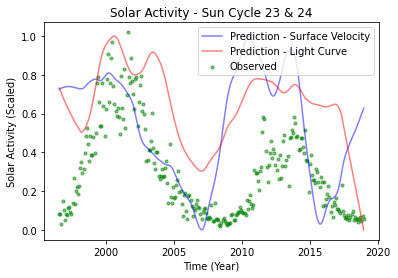

In [86]:
figure, axis_1 = plt.subplots()
plt.xlabel('Time (Year)')
plt.title('Solar Activity - Sun Cycle 23 & 24')

print(pred_BiSON.shape, SN_ts_full_fit.T[0].shape)
print(SN_ts_full_fit.T[0][0],SN_ts_full_fit.T[0][-1])
pred_x = np.arange(1996.586,2019.008,(2019.008-1996.586)/len(SN_ts_full_fit.T[0]))

#Axis 1
axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.set_ylabel('Solar Activity (Scaled)')
#axis_1.scatter(pred_x,pred_BiSON, s = 10, c='blue', alpha=0.5, label="pred_BiSON")
#x1_ITP, y1_ITP = interpolate(np.array([pred_x,pred_BiSON]).T,140)
ITP_BiSON = sm.nonparametric.lowess(pred_BiSON,pred_x,frac=0.15).T
axis_1.plot(ITP_BiSON[0],normalizePred(ITP_BiSON[1]), c='blue', alpha=0.5, label = "Prediction - Surface Velocity")

# #Axis 2
# axis_2 = axis_1.twinx()
#axis_2.set_ylabel('LOI (Scaling)')
#axis_1.scatter(pred_x,pred_LOI, s = 10, c='red', alpha=0.5, label="pred_LOI")
#x2_ITP, y2_ITP = interpolate(np.array([pred_x,pred_LOI]).T,140)
ITP_LOI = sm.nonparametric.lowess(pred_LOI,pred_x,frac=0.15).T
axis_1.plot(ITP_LOI[0], normalizePred(ITP_LOI[1]), c='red', alpha=0.5, label = "Prediction - Light Curve")

#Axis 3
#axis_3 = axis_1.twinx()
#axis_3.axis("off")
#axis_3.set_ylabel('SN')
axis_1.scatter(pred_x,np.add(normalizePred(SN_ts_full_fit.T[1]),0.02), s = 10, c='green', alpha=0.5, label="Observed")

#Append Labels
lines_1, labels_1 = axis_1.get_legend_handles_labels()
#lines_2, labels_2 = axis_2.get_legend_handles_labels()
#lines_3, labels_3 = axis_3.get_legend_handles_labels()
lines = lines_1
labels = labels_1
axis_1.legend(lines, labels, loc=0)

#Show Plot
#plt.savefig('Graphs/C23_Numax_SSN_Time.png')
plt.savefig('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Graphs/BiSON_LOI_SN.png')
plt.show()

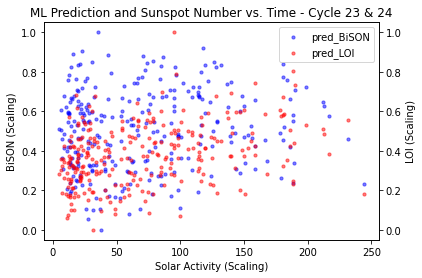

In [85]:
figure, axis_1 = plt.subplots()
plt.xlabel('Solar Activity (Scaling)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 23 & 24')

#Axis 1
axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.set_ylabel('BiSON (Scaling)')
axis_1.scatter(SN_ts_full_fit.T[1],normalizePred(pred_BiSON), s = 10, c='blue', alpha=0.5, label="pred_BiSON")

#Axis 2
axis_2 = axis_1.twinx()
axis_2.set_ylabel('LOI (Scaling)')
axis_2.scatter(SN_ts_full_fit.T[1],normalizePred(pred_LOI), s = 10, c='red', alpha=0.5, label="pred_LOI")

# #Axis 3
# axis_3 = axis_1.twinx()
# axis_3.axis("off")
# axis_3.set_ylabel('SN')
# axis_3.scatter(datax_SN,datay_SN, s = 10, c='green', alpha=0.5, label="actual_SN")

#Append Labels
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
# lines_3, labels_3 = axis_3.get_legend_handles_labels()
lines = lines_1 + lines_2 #+ lines_3
labels = labels_1 + labels_2 #+ labels_3
axis_1.legend(lines, labels, loc=0)

#Show Plot
#plt.savefig('Graphs/C23_Numax_SSN_Time.png')
plt.savefig('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Graphs/BiSON_LOI_SN.png')
plt.show()

In [ ]:
sn_ts_full_fit_norm = normalize1D(SN_ts_full_fit.T[1])
BiSONxSN_mse = np.sqrt(mean_squared_error(sn_ts_full_fit_norm,pred_BiSON))
BiSONxSN_mae = mean_absolute_error(sn_ts_full_fit_norm,pred_BiSON)
print("BiSON vs. Actual - Mean Sq. Error, Mean Abs. Error")
print(BiSONxSN_mse,BiSONxSN_mae)

BiSON vs. Actual - Mean Sq. Error, Mean Abs. Error
0.1801844415787202 0.14603203272802523


In [ ]:
LOIxSN_mse = np.sqrt(mean_squared_error(sn_ts_full_fit_norm,pred_LOI))
LOIxSN_mae = mean_absolute_error(sn_ts_full_fit_norm,pred_LOI)
print("LOI vs. Actual - Mean Sq. Error, Mean Abs. Error")
print(LOIxSN_mse,LOIxSN_mae)

LOI vs. Actual - Mean Sq. Error, Mean Abs. Error
0.11264252022539821 0.08263648746113517


In [ ]:
BiSONxLOI_mse = np.sqrt(mean_squared_error(pred_BiSON,pred_LOI))
BiSONxLOI_mae = mean_absolute_error(pred_BiSON,pred_LOI)
print("BiSON vs. LOI - Mean Sq. Error, Mean Abs. Error")
print(BiSONxLOI_mse,BiSONxLOI_mae)

BiSON vs. LOI - Mean Sq. Error, Mean Abs. Error
0.14846042 0.116639346


In [ ]:
print(sklearn.metrics.r2_score(normalizePred(SN_ts_full_fit.T[1]), normalizePred(pred_BiSON)))
print(sklearn.metrics.r2_score(normalizePred(SN_ts_full_fit.T[1]), normalizePred(pred_LOI)))

0.2782344967621362
0.7561239054969247


In [ ]:
#model.save('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/ML/p010')

## Helper Functions - Prediction

In [ ]:
def getData(koi_name,skipfront=0):
  search_result = lk.search_lightcurve(koi_name, author='Kepler', cadence="short")
  lc_test = search_result.download_all().stitch()
  lc_test = lc_test.fill_gaps()
  lc_table = lc_test.to_table()
  lc_array = np.array(lc_table['flux'])[skipfront*1440:]
  lcdatax = np.arange(0,len(lc_array)/1440,1/1440)
  lcfull = np.append([lcdatax],[lc_array],0).T
  return lcfull

In [ ]:
# search_result = lk.search_lightcurve("KIC 2571238", author='Kepler', cadence="short")
# #[1871056,8120608,2571238,2692377,3632418,3544595,11968749] #8120608, 2571238
# lc_test = search_result.download_all().stitch()
# lc_test = lc_test.fill_gaps()

In [ ]:
#print(getData("KIC 2571238"))

In [ ]:
# search_result = lk.search_lightcurve("KIC 10454113", author='Kepler', cadence="short")
# lc_test = search_result.download_all().stitch()
# lc_test = lc_test.fill_gaps()
# lc_test.plot()

In [ ]:
def prepData(data):
  power, numax = tsPower(data.T[0],data.T[1],90,30)
  power = normalize2D(power,"LOI")
  return power,numax

In [ ]:
def predData(power):
  pred = model.predict(power).reshape(-1)
  return pred

In [ ]:
def getSlice(data):
  power, numax = tsPower(data.T[0],data.T[1],90,30)
  return normalize2D(power)

In [ ]:
def to3D(data):
  return data.reshape(data.shape[0],1,data.shape[1])

In [ ]:
def addFiller(data,totallength):
  while len(data) < totallength:
    data = np.append(data,0.5)
  return data

In [ ]:
def findMaxLen(data): 
    maxLength = max(len(x) for x in data) 
    return maxLength 

In [ ]:
def prepAll(data):
  starpreds = []
  for star in data:
    try:
      stardata = getData(("KIC "+str(star)))
      stardata = prepData(stardata)[0]
      starpreds.append(stardata)
    except:
      continue
  return starpreds

In [ ]:
def predAll(data):
  starpreds = []
  for star in data:
    try:
      stardata = to3D(star)
      stardata = normalizePred(predData(stardata))
      starpreds.append(stardata)
    except:
      continue
  starfill = []
  maxlen = findMaxLen(starpreds)
  for starpred in starpreds:
    starfill.append(addFiller(starpred,maxlen))
  return starfill

## Data - Prediction

### Simple

In [ ]:
lc1 = getData("KIC 10454113",400)
lc2 = getData("KIC 8006161",400)
lc3 = getData("KIC 6116048",400)

NameError: ignored

In [ ]:
#lc4 = getData("KIC 6444896",400)
lc5 = getData("KIC 8120608")

NameError: ignored

In [ ]:
lc1_prep,p1 = prepData(lc1)
lc2_prep,p2 = prepData(lc2)
lc3_prep,p3 = prepData(lc3)

In [ ]:
lc5_prep,p5 = prepData(lc5)
lc5_prep = lc5_prep.reshape(lc5_prep.shape[0],1,lc5_prep.shape[1])

In [ ]:
IS_3D = True
if IS_3D:
    lc1_prep = lc1_prep.reshape(lc1_prep.shape[0],1,lc1_prep.shape[1])
    lc2_prep = lc2_prep.reshape(lc2_prep.shape[0],1,lc2_prep.shape[1])
    lc3_prep = lc3_prep.reshape(lc3_prep.shape[0],1,lc3_prep.shape[1])

In [ ]:
pred1 = predData(lc1_prep)
pred2 = predData(lc2_prep)
pred3 = predData(lc3_prep)

print(pred1[0:10])

In [ ]:
pred5 = predData(lc5_prep)
print(pred5)
print(len(pred5),len(pred3))

In [ ]:
#figure, axis_1 = plt.subplots()
plt.xlabel('Time (BJD)')
plt.ylabel("Predicted Solar Activity")
plt.title('Predicted Solar Activity vs. Time')

lc_predy1 = pred1
lc_predy2 = pred2
lc_predy3 = pred3

lc_predx = np.arange(200,int(len(lc_predy1))*30+200,30)

#Axis 1
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(lc_predx,lc_predy1, s = 10, c='blue', alpha=0.5, label="KIC 10454113")
x1_ITP, y1_ITP = interpolate(np.array([lc_predx,lc_predy1]).T,30)
plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='blue', alpha=0.5)

#axis_2 = axis_1.twinx()
#axis_2.set_ylabel('LOI (Scaling)')
plt.scatter(lc_predx,lc_predy2, s = 5, c='red', alpha=0.5, label="KIC 8006161")
x2_ITP, y2_ITP = interpolate(np.array([lc_predx,lc_predy2]).T,30)
plt.plot(x2_ITP, y2_ITP, c='red', alpha=0.5)

#axis_3 = axis_1.twinx()
#axis_3.set_ylabel('LOI (Scaling)')
plt.scatter(lc_predx,lc_predy3, s = 5, c='green', alpha=0.5, label="KIC 6116048")
x2_ITP, y2_ITP = interpolate(np.array([lc_predx,lc_predy3]).T,30)
plt.plot(x2_ITP, y2_ITP, c='green', alpha=0.5)

plt.legend()
plt.show()

In [ ]:
exohost = [1871056,8120608,2571238,2692377,3632418,3544595,11968749] #11554100,
#First 6 Exoplanet, Last red giant

In [ ]:
search_result = lk.search_lightcurve("KIC 11968749", author='Kepler', cadence="short")
lc_test = search_result.download_all().stitch()
lc_test = lc_test.fill_gaps()
lc_test.plot()

In [ ]:
exohost_data = []
for star in exohost:
  exohost_data.append(getData(("KIC "+str(star))))

In [ ]:
print(exohost_data[0][0])

In [ ]:
exohost_prep = []
for stardata in exohost_data:
  exohost_prep.append(prepData(stardata)[0])

In [ ]:
for i in range(len(exohost_prep)):
  exohost_prep[i] = to3D(exohost_prep[i])

In [ ]:
exohost_pred = []
for starpred in exohost_prep:
  exohost_pred.append(predData(starpred))

In [ ]:
exohost_fill = []
maxlen2 = findMaxLen(exohost_pred)
for starpred in exohost_pred:
  exohost_fill.append(addFiller(starpred,maxlen))

### Streamline

In [ ]:
null_flag = [1435467,2837475,3424541,3427720,3456181]#,3632418,3656476,3733735,3735871]
red_giant = [11968749]
false_positive = [5356593,5652983,8505215]
exohost = [1871056,2571238,2692377,3102384,3323887,3544595,3632418,4833421,4914423,8120608]
exopotential = [2444412,4055765,5897826]
experiment = [11968749]#7771282,4638884]#,8026226,9226926] #10644253

In [ ]:
exohost_data = prepAll(experiment)

In [ ]:
exohost_preds = predAll(exohost_data)

In [ ]:
print(len(exohost_preds))

1


1


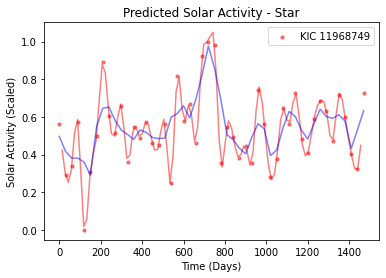

In [ ]:
plt.xlabel('Time (Days)')
plt.ylabel("Solar Activity (Scaled)")
plt.title('Predicted Solar Activity - Star')

exohost_fill = exohost_preds
print(len(exohost_fill))

maxlen = findMaxLen(exohost_fill)
lcx = np.arange(0,maxlen*30,30)

plt.autoscale(enable=True, axis='both', tight=None)

# for i in range(len(exohost_fill)):
#   plt.scatter(lcx,exohost_fill[i], s = 10, c='blue', alpha=0.5, label=("KIC"+str(exohost[i])))
#   x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[i]]).T,30)
#   plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='blue', alpha=0.5)
plt.scatter(lcx,exohost_fill[0], s = 10, c='red', alpha=0.5,label=("KIC "+str(experiment[0])))
# plt.scatter([0],[0], s = 8, c='black', alpha=0.5,label="Mathur et al. 2014 Prediction")
x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[0]]).T,100)
y2_ITP = sm.nonparametric.lowess(exohost_fill[0],lcx,frac=0.1).T
plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='red', alpha=0.5)
plt.plot(y2_ITP[0],y2_ITP[1], c='blue', alpha=0.5)

# plt.scatter(lcx,exohost_fill[1], s = 10, c='red', alpha=0.5, label=("KIC"+str(experiment[1])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[1]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='red', alpha=0.5)

# plt.scatter(lcx,exohost_fill[2], s = 10, c='green', alpha=0.5, label=("KIC"+str(exohost_fill[2])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[2]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='green', alpha=0.5)

# #plt.scatter(lcx,exohost_fill[3], s = 10, c='orange', alpha=0.5, label=("KIC"+str(exohost[3])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[3]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='orange', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[4], s = 10, c='purple', alpha=0.5, label=("KIC"+str(exohost[4])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[4]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='purple', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[5], s = 10, c='black', alpha=0.5, label=("KIC"+str(exohost[5])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[5]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='black', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[6], s = 10, c='brown', alpha=0.5, label=("KIC"+str(exohost[6])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[6]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='brown', alpha=0.5)

# #plt.scatter(lcx,exohost_fill[7], s = 10, c='orange', alpha=0.5, label=("KIC"+str(exohost[7])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[7]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='orange', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[8], s = 10, c='purple', alpha=0.5, label=("KIC"+str(exohost[8])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[8]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='purple', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[9], s = 10, c='black', alpha=0.5, label=("KIC"+str(exohost[9])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[9]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='black', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[10], s = 10, c='brown', alpha=0.5, label=("KIC"+str(exohost[10])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[10]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='brown', alpha=0.5)

# #plt.scatter(lcx,exohost_fill[11], s = 10, c='orange', alpha=0.5, label=("KIC"+str(exohost[11])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[11]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='orange', alpha=0.5)
# #plt.scatter(lcx,exohost_fill[12], s = 10, c='purple', alpha=0.5, label=("KIC"+str(exohost[12])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[12]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='purple', alpha=0.5)


# plt.scatter(lcx,exohost_fill[3], s = 10, c='purple', alpha=0.5, label=("KIC"+str(exohost[3])))
# x1_ITP, y1_ITP = interpolate(np.array([lcx,exohost_fill[3]]).T,30)
# plt.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='purple', alpha=0.5)



plt.legend()
plt.savefig('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Graphs/pred_lc.png')
plt.show()

## Compare Datasets

In [ ]:
#23
#   print(BiSON_ts_23.shape,SN_ts_23.shape,LOI_ts_23.shape)

#24
#   print(BiSON_ts_24_fit.shape,SN_ts_24_fit.shape,LOI_ts_24.shape)

#Full
#   print(BiSON_ts_full_fit.shape,SN_ts_full_fit.shape,LOI_ts_full.shape)
y1 = normalize2D(BiSON_ts_full_fit)[0]
y2 = normalize2D(LOI_ts_full)[0]
y3 = lc1_prep[0]

NameError: ignored

In [ ]:
def filterPg(pg):
  discard = 0.3
  for i in range(int(len(pg))):
    if pg[i] <= discard:
      pg[i] = 0
  #   else:
  #     pg[i] -= discard
  # pg = np.divide(pg,np.max(pg))
  return pg

[ 992. 1380. 1622. 2132. 2916. 3371. 4148. 4526. 4939. 5290. 5836. 6571.
 6951. 7354.] [0.44721106 0.49577136 0.56318943 0.54038116 1.         0.39177608
 0.36370707 0.53226221 0.47128111 0.35626258 0.50778757 0.52390755
 0.55922793 0.35757202 0.44401813 0.04963992]
7776


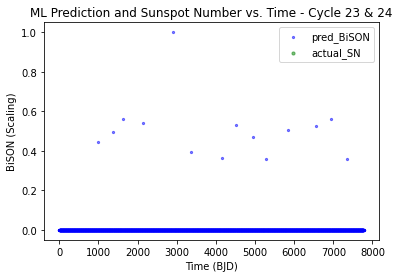

In [ ]:
figure, axis_1 = plt.subplots()
plt.xlabel('Time (BJD)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 23 & 24')
# for i in range(len(y3)):
#   if y3[i] < 0.4:
#     y3[i] = 0
# print(y3[0])
  

x1 = np.arange(0,7776)

y4 = []
for value in x1:
    check = True
    for i in range(int(len(tfreqs))):
        if int(tfreqs[i]-1) == value:
            y4 = np.append(y4,tmodes[i])
            check = False
            break
    if check:
        y4 = np.append(y4,0)

print(len(y4))

#Axis 1
axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.set_ylabel('BiSON (Scaling)')
axis_1.scatter(x1,y4, s = 5, c='blue', alpha=0.5, label="pred_BiSON")
# x1_ITP, y1_ITP = interpolate(np.array([x1,y1]).T,50)
# axis_1.plot(x1_ITP, y1_ITP, c='blue', alpha=0.5, label = "Pred. BiSON")

# # #Axis 2
# axis_2 = axis_1.twinx()
# axis_2.set_ylabel('LOI (Scaling)')
# axis_2.scatter(x1,y2, s = 5, c='red', alpha=0.5, label="pred_LOI")
# x2_ITP, y2_ITP = interpolate(np.array([x1,y2]).T,50)
# axis_1.plot(x2_ITP, y2_ITP, c='red', alpha=0.5, label = "Pred. LOI")

# #Axis 3
# axis_3 = axis_1.twinx()
# axis_3.axis("off")
# axis_3.set_ylabel('SN')
# axis_3.scatter(x1,y4, s = 5, c='green', alpha=0.5, label="actual_SN")

#Append Labels
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines_3, labels_3 = axis_3.get_legend_handles_labels()
lines = lines_1 + lines_2 + lines_3
labels = labels_1 + labels_2 + labels_3
axis_1.legend(lines, labels, loc=0)
plt.show()

In [ ]:
lk.seismology.estimate_deltanu_acf2d?

## Test Code

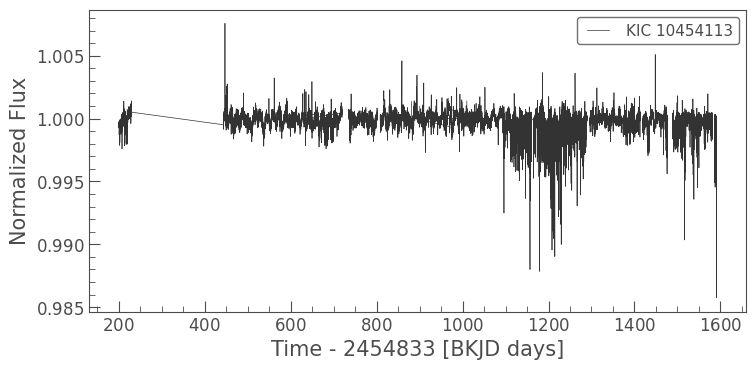

In [ ]:
search_result = lk.search_lightcurve('KIC 10454113', author='Kepler', cadence="short")
search_result
lc_test = search_result.download_all().stitch()
lc_test.plot()

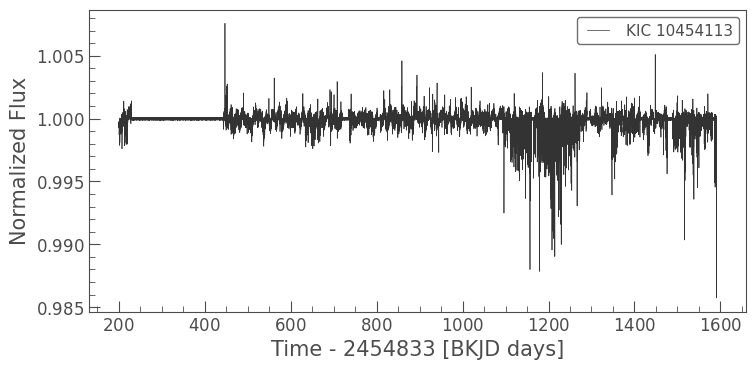

In [ ]:
lc_test = lc_test.fill_gaps()
lc_test.plot()

In [ ]:
Dlc_table = lc_test.to_table()
lc_array = np.array(lc_table['flux'])
print(lc_array)

In [ ]:
lcdatax = np.arange(0,len(lc_array)/1440,1/1440)
lcfull = np.append([lcdatax],[lc_array],0).T
print(lcfull.shape)

(1996170, 2)


In [ ]:
print(lcfull[-1])

[1.38622847e+03 1.00039232e+00]


In [ ]:
lc_power, lc_numax = tsPower(lcfull.T[0],lcfull.T[1],90,30)

In [ ]:
print(lc_power.shape,lc_numax)

(44, 7776) 1425


In [ ]:
lc_power_norm = normalize2D(lc_power)
print(np.max(lc_power_norm))

1.0


In [ ]:
pred_lc = model.predict(lc_power_norm[9:]).reshape(-1)
print(pred_lc.shape)
print(pred_lc)

(35,)
[2.1501856 2.1978247 2.218618  1.9813035 1.8138002 1.6447774 1.7670627
 1.3543344 1.6227567 1.4145533 1.6896728 1.8097239 1.6240644 2.0843878
 2.0923507 1.9381614 2.283571  2.4614487 2.109753  1.9923794 2.4358625
 2.504476  2.693074  2.2238019 2.4378045 2.00395   1.5316311 2.0904558
 1.6939368 1.8036245 1.837662  1.5059265 2.7730196 2.3647003 2.3227234]


<function matplotlib.pyplot.show>

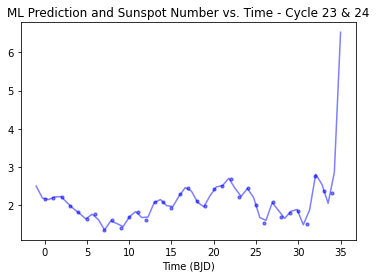

In [ ]:
plt.xlabel('Time (BJD)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 23 & 24')

lc_testx = np.arange(0,int(len(pred_lc)))

#Axis 1
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(lc_testx,pred_lc, s = 10, c='blue', alpha=0.5, label="pred_BiSON")
x1_ITP, y1_ITP = interpolate(np.array([lc_testx,pred_lc]).T,50)
plt.plot(x1_ITP, y1_ITP, c='blue', alpha=0.5, label = "Pred. BiSON")

plt.show

In [ ]:
lcdata3 = getData("KIC 6116048")

In [ ]:
lc_power, lc_numax = tsPower(lcdata3.T[0],lcdata3.T[1],90,30)

In [ ]:
lc_power_norm = normalize2D(lc_power)
print(np.max(lc_power_norm))

1.0


In [ ]:
pred_lc = model.predict(lc_power_norm[9:]).reshape(-1)
print(pred_lc.shape)
print(pred_lc)

(36,)
[0.5277961  0.63132465 0.40478465 0.42059588 0.5209544  0.7009002
 1.031577   0.7302094  0.58843035 0.5559162  0.57662654 0.58658266
 0.5535707  0.4052446  0.38021135 0.54982436 1.748396   1.4241097
 2.086725   1.1885546  1.8470598  1.8879963  1.9531791  1.8862461
 1.4063263  1.131757   1.1278707  1.4685751  1.067278   1.2002715
 1.1034241  0.6847471  0.71507204 1.2039894  1.3913287  1.1852996 ]


In [ ]:
lcdata4 = getData("KIC 12009504")

In [ ]:
lc_power2, lc_numax2 = tsPower(lcdata4.T[0],lcdata4.T[1],90,30)

In [ ]:
lc_power_norm2 = normalize2D(lc_power2)
print(np.max(lc_power_norm2))
pred_lc2 = model.predict(lc_power_norm2[9:-2]).reshape(-1)
print(pred_lc2.shape)
print(pred_lc2)

1.0
(36,)
[1.0906223  1.0631001  1.0119612  1.1853065  1.2532316  0.87308747
 0.9431411  0.9877703  1.6166066  1.683091   1.5640908  0.886065
 1.0997486  1.0799937  1.2167377  0.99084055 1.1682     1.0814201
 1.524697   1.6352017  1.7068578  1.4969152  0.9861238  1.2276504
 1.0122035  1.7186154  1.7474402  2.0638342  2.1568449  1.5226185
 1.688213   1.412455   1.489743   1.0179482  1.2917794  0.8883791 ]


In [ ]:
lcdata5 = getData("KIC 8006161")

In [ ]:
lc_power3, lc_numax3 = tsPower(lcdata5.T[0],lcdata5.T[1],90,30)

In [ ]:
lc_power_norm3 = normalize2D(lc_power3)
print(np.max(lc_power_norm3))
pred_lc3 = model.predict(lc_power_norm3[9:]).reshape(-1)
print(pred_lc3.shape)
print(pred_lc3)

1.0
(36,)
[0.51671636 0.4697245  0.5306659  0.4744122  0.5324677  0.8603418
 0.8463695  0.9316367  1.2206714  1.2951821  0.85572636 0.7345146
 0.80385494 0.774252   1.3114283  1.420307   1.7812022  1.5878102
 1.1935314  1.2851081  1.3955448  2.1604865  2.4565613  1.9691529
 1.7256997  1.3129588  1.7235616  1.5142536  1.7675918  1.2173353
 0.9837395  0.6535239  2.0073683  1.9211634  1.6827221  1.8208772 ]


<function matplotlib.pyplot.show>

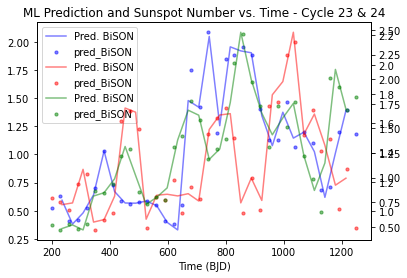

In [ ]:
figure, axis_1 = plt.subplots()
plt.xlabel('Time (BJD)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 23 & 24')

lc_testx = np.arange(200,int(len(pred_lc))*30+200,30)



#Axis 1
axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.scatter(lc_testx,pred_lc, s = 10, c='blue', alpha=0.5, label="pred_BiSON")
x1_ITP, y1_ITP = interpolate(np.array([lc_testx,pred_lc]).T,30)
axis_1.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='blue', alpha=0.5, label = "Pred. BiSON")


# #Axis 2
axis_2 = axis_1.twinx()
axis_2.scatter(lc_testx,pred_lc2, s = 10, c='red', alpha=0.5, label="pred_BiSON")
x1_ITP, y1_ITP = interpolate(np.array([lc_testx,pred_lc2]).T,30)
axis_2.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='red', alpha=0.5, label = "Pred. BiSON")


# #Axis 3
axis_3 = axis_1.twinx()
axis_3.scatter(lc_testx,pred_lc3, s = 10, c='green', alpha=0.5, label="pred_BiSON")
x1_ITP, y1_ITP = interpolate(np.array([lc_testx,pred_lc3]).T,30)
axis_3.plot(x1_ITP[1:-1], y1_ITP[1:-1], c='green', alpha=0.5, label = "Pred. BiSON")

#Append Labels
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines_3, labels_3 = axis_3.get_legend_handles_labels()
lines = lines_1 + lines_2 + lines_3
labels = labels_1 + labels_2 + labels_3
axis_1.legend(lines, labels, loc=0)


plt.show